In [2]:
#Task1:-Understanding the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
df=pd.read_csv(r"D:\personal stuff\ANEESH SHARMA\PROFESSIONAL COURSES\HERO VIRED DATA ANALYST\COURSE CIRRICULAM\PYTHON\graded project\bank_marketing_updated_v1.csv",header=2)
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [3]:
time_str=df["duration"]
def convert_to_seconds(time_str):
        value,unit=time_str.split()
        value=float(value)
        if unit =='min':
            return value*60
        elif unit =='sec':
            return value
df["total_duration"]=df["duration"].apply(convert_to_seconds)
df[["occupation","sector"]] =df["jobedu"].str.split(",",expand=True)
df[["months","year"]]=df["month"].str.split(",",expand=True)
df["year"]=df["year"].astype(float)
df["total_duration"]=df["total_duration"].astype(float)
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,total_duration,occupation,sector,months,year
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,261.0,management,tertiary,may,2017.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,151.0,technician,secondary,may,2017.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,76.0,entrepreneur,secondary,may,2017.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,92.0,blue-collar,unknown,may,2017.0
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,198.0,unknown,unknown,may,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,977.0,technician,tertiary,nov,2017.0
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,456.0,retired,primary,nov,2017.0
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,1127.0,retired,secondary,nov,2017.0
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,508.0,blue-collar,secondary,nov,2017.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerid      45211 non-null  int64  
 1   age             45191 non-null  float64
 2   salary          45211 non-null  int64  
 3   balance         45211 non-null  int64  
 4   marital         45211 non-null  object 
 5   jobedu          45211 non-null  object 
 6   targeted        45211 non-null  object 
 7   default         45211 non-null  object 
 8   housing         45211 non-null  object 
 9   loan            45211 non-null  object 
 10  contact         45211 non-null  object 
 11  day             45211 non-null  int64  
 12  month           45161 non-null  object 
 13  duration        45211 non-null  object 
 14  campaign        45211 non-null  int64  
 15  pdays           45211 non-null  int64  
 16  previous        45211 non-null  int64  
 17  poutcome        45211 non-null 

In [5]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,total_duration,occupation,sector,months,year
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,261.0,management,tertiary,may,2017.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,151.0,technician,secondary,may,2017.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,76.0,entrepreneur,secondary,may,2017.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,92.0,blue-collar,unknown,may,2017.0
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,198.0,unknown,unknown,may,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,977.0,technician,tertiary,nov,2017.0
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,456.0,retired,primary,nov,2017.0
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,1127.0,retired,secondary,nov,2017.0
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,508.0,blue-collar,secondary,nov,2017.0


In [6]:
#missing values in age,response,months and year
df.isna().sum()

customerid         0
age               20
salary             0
balance            0
marital            0
jobedu             0
targeted           0
default            0
housing            0
loan               0
contact            0
day                0
month             50
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response          30
total_duration     0
occupation         0
sector             0
months            50
year              50
dtype: int64

In [7]:
#to get total number of highest values & missing values in each categorical values
df["response"].value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [8]:
df["response"].isna().sum()

30

In [9]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [10]:
df["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [11]:
df["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [12]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [13]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [14]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [15]:
df["sector"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: sector, dtype: int64

In [16]:
df["occupation"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: occupation, dtype: int64

In [17]:
#total number of missing values in different columns
df["months"].isna().sum()

50

In [18]:
df["age"].isna().sum()

20

In [19]:
df["year"].isna().sum()

50

In [20]:
df["response"].isna().sum()

30

In [21]:
#Task2:-Descriptive analysis
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous,total_duration,year
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45161.0
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323,258.163080,2017.0
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441,257.527812,0.0
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,2017.0
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000,103.000000,2017.0
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000,180.000000,2017.0
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000,319.000000,2017.0
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000,4918.000000,2017.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x2000 with 0 Axes>

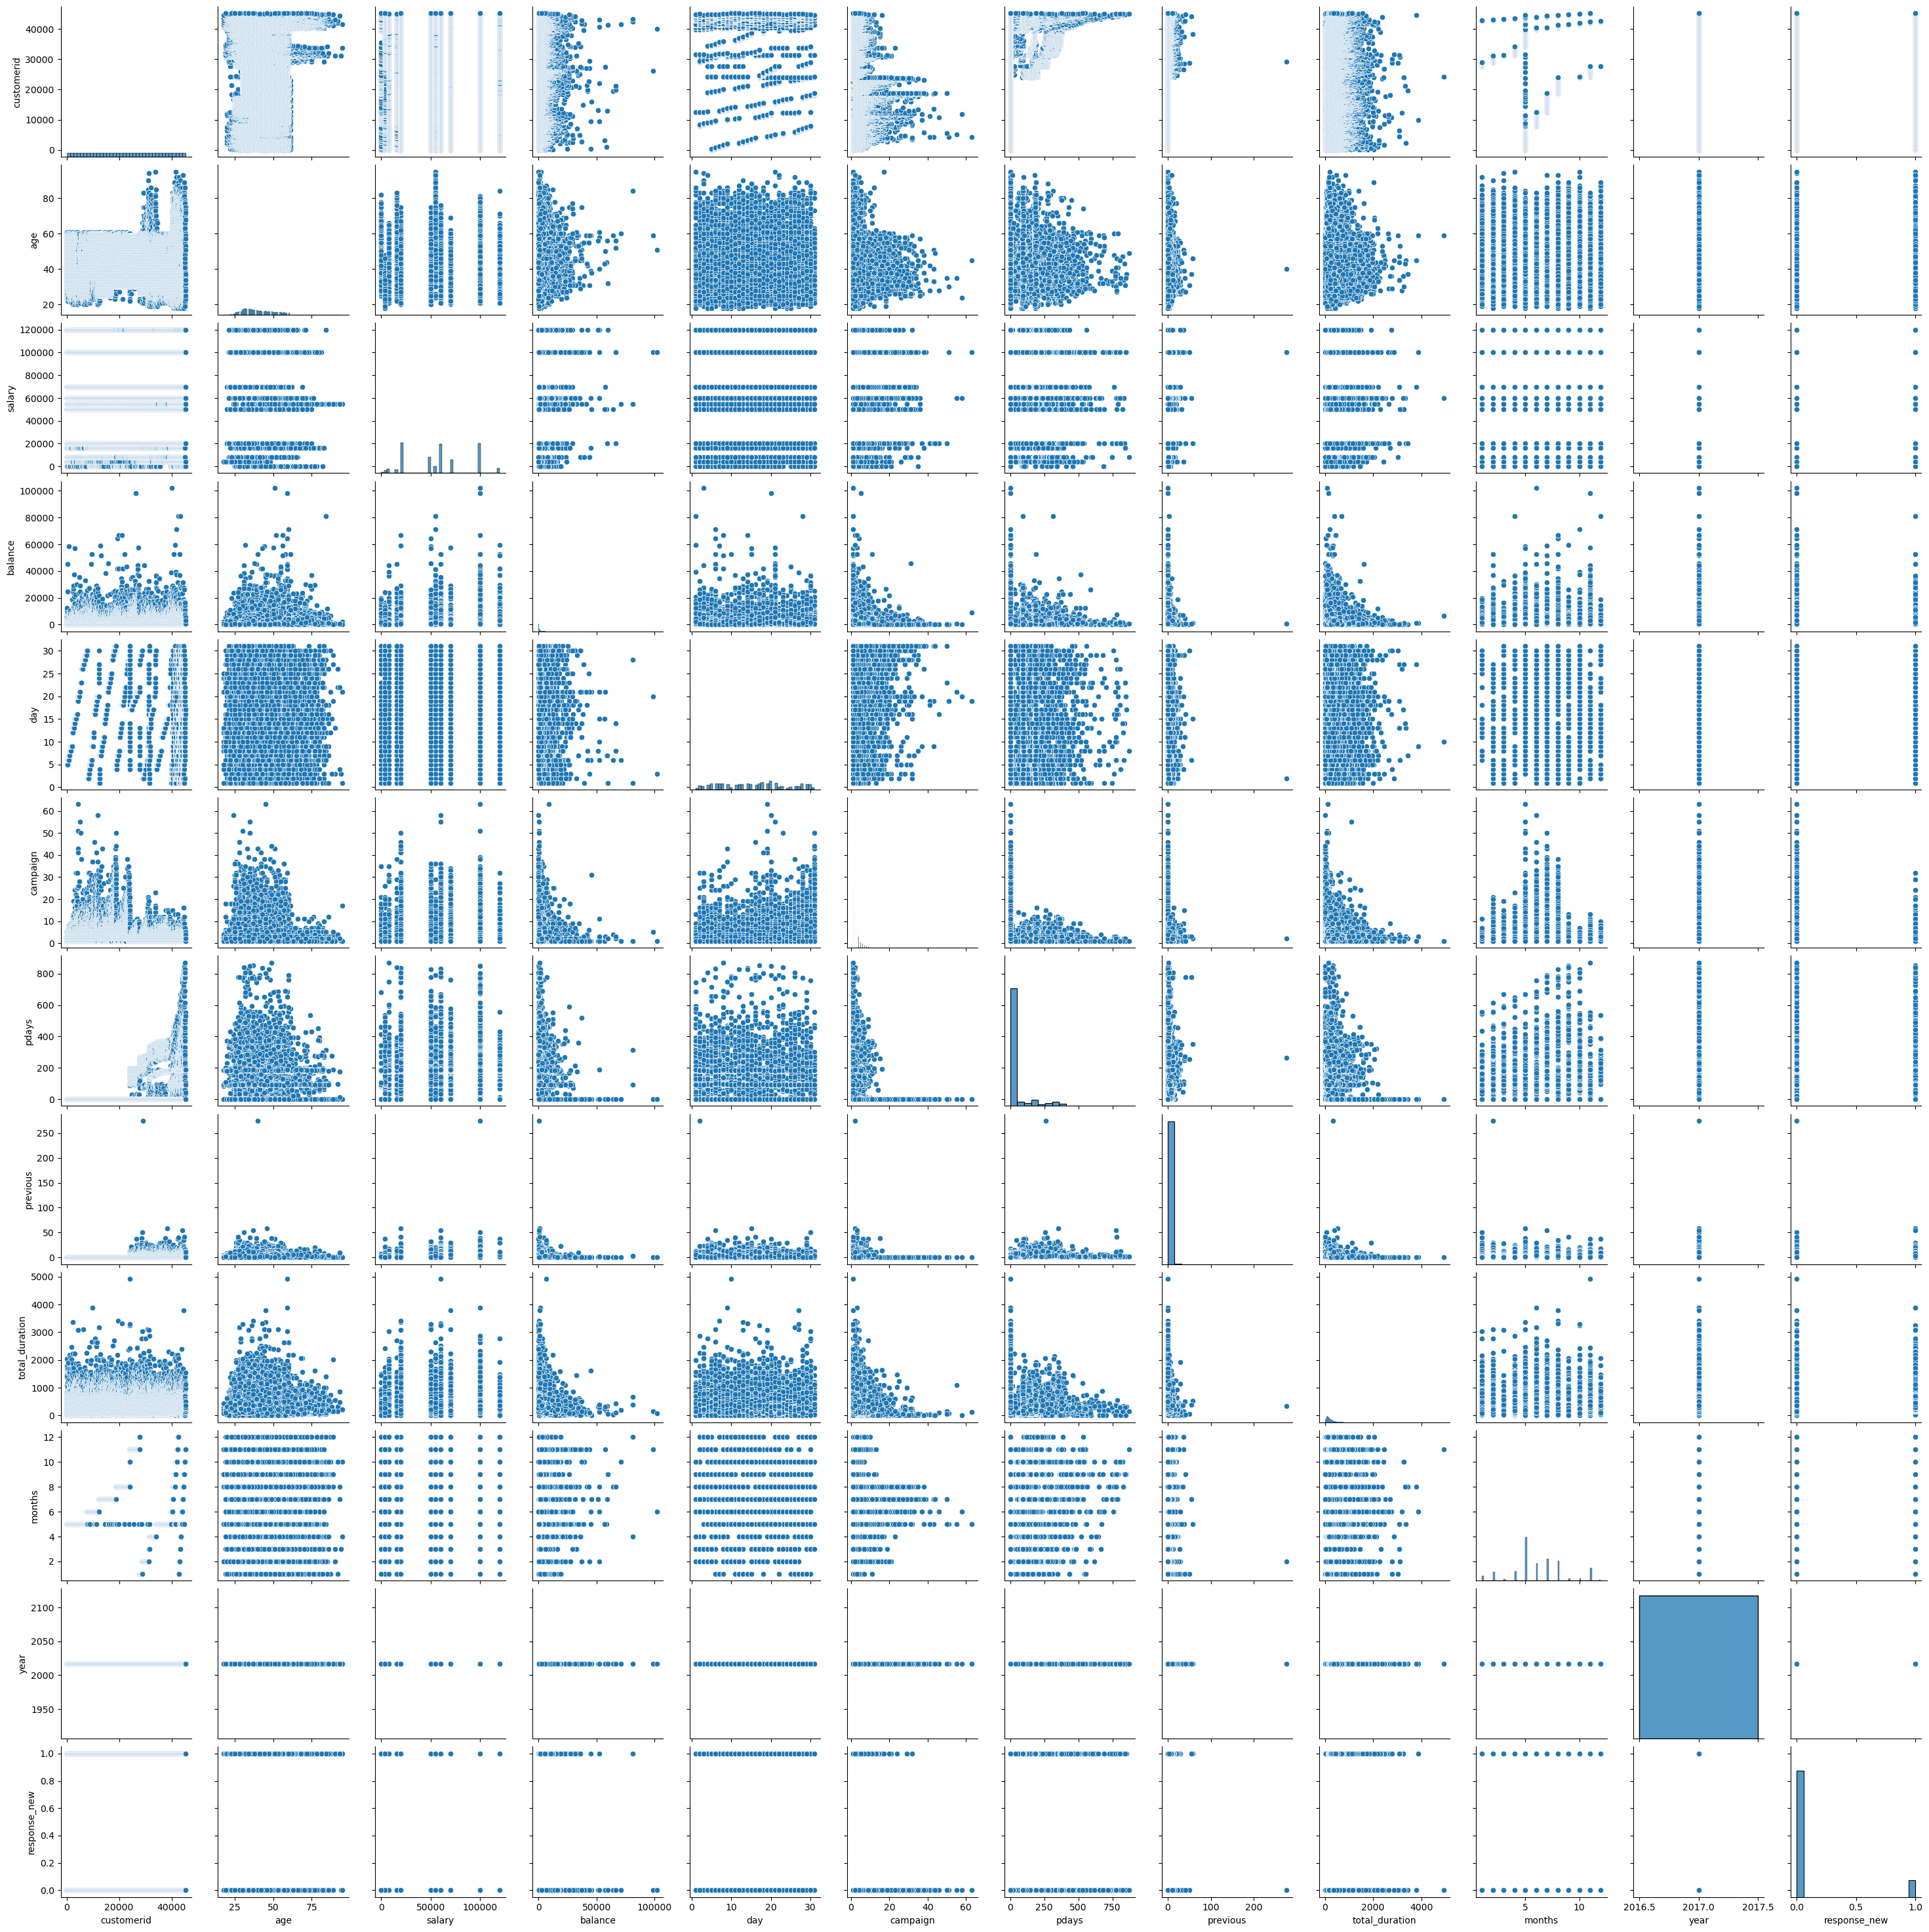

In [80]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show

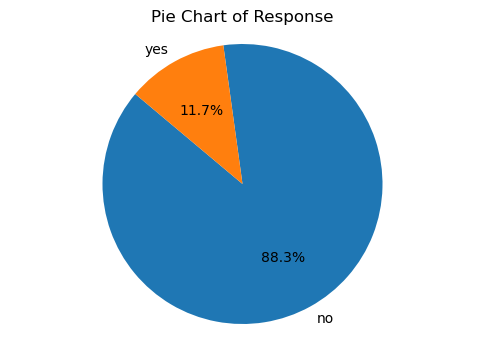

In [22]:
#response will be the target variable here 
categorical_column = 'response'
category_counts = df['response'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Response')
plt.axis('equal') 
plt.show()

In [23]:
#more number of negative response here
df["response"].value_counts()

no     39894
yes     5287
Name: response, dtype: int64

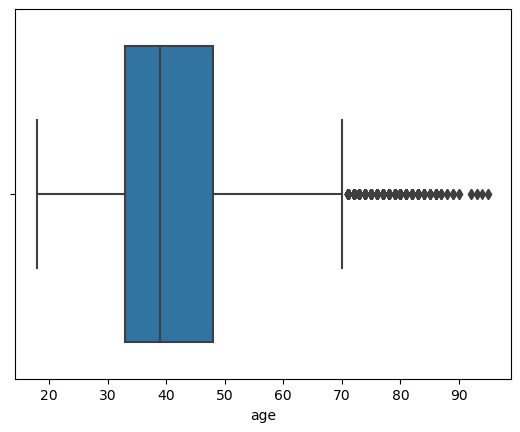

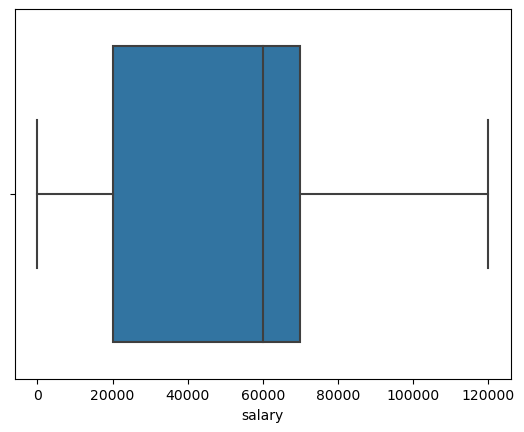

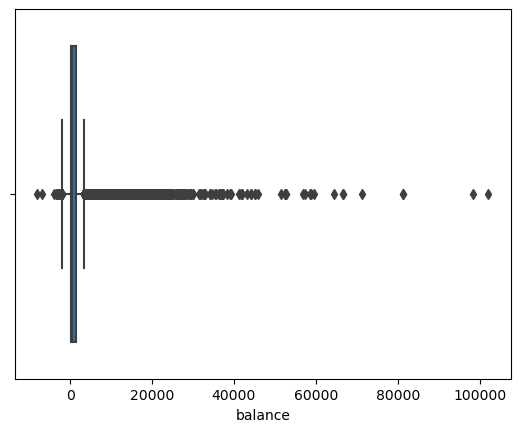

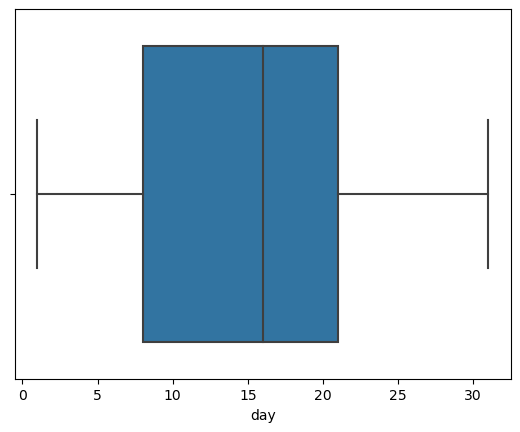

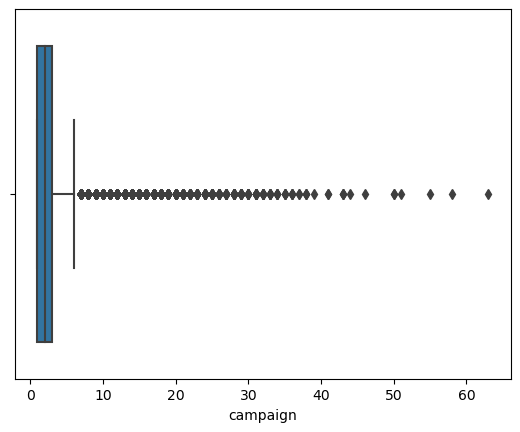

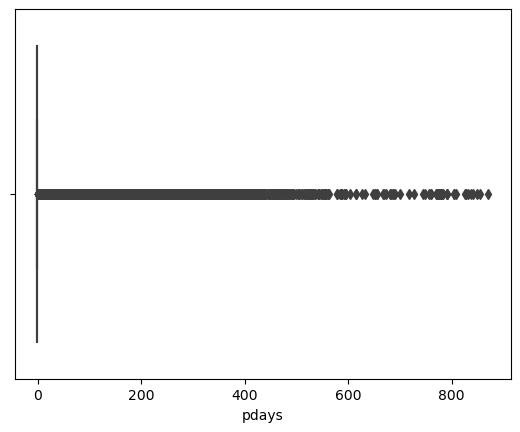

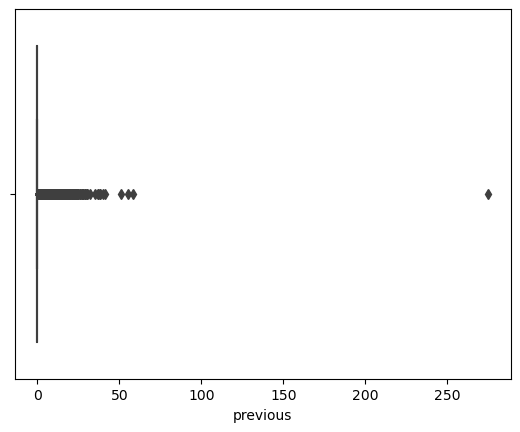

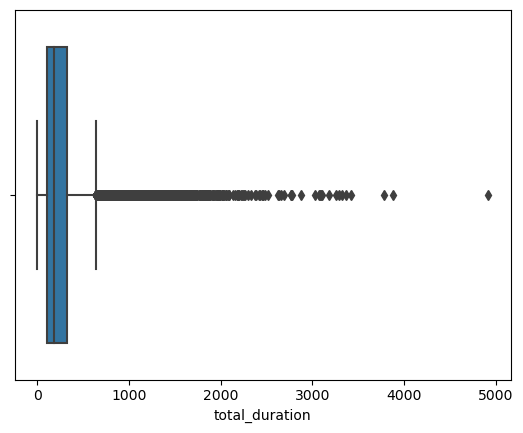

In [24]:
#Task3:-univariante analysis for numerical columns
list_num=["age","salary","balance","day","campaign","pdays","previous","total_duration"]
for i in list_num:
    sns.boxplot(x=df[i])
    plt.show()

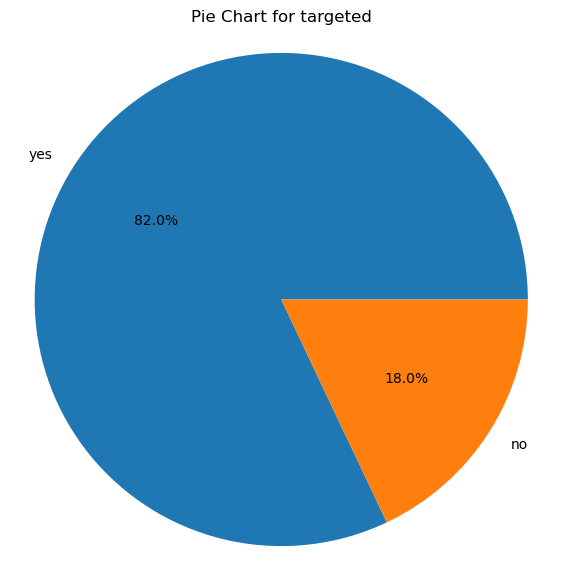

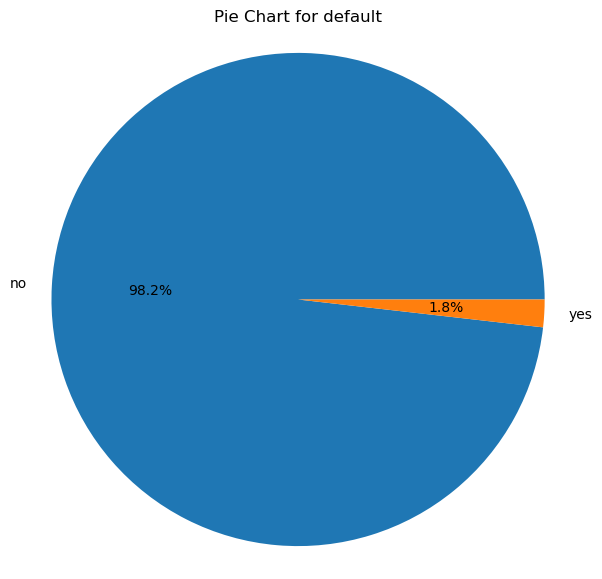

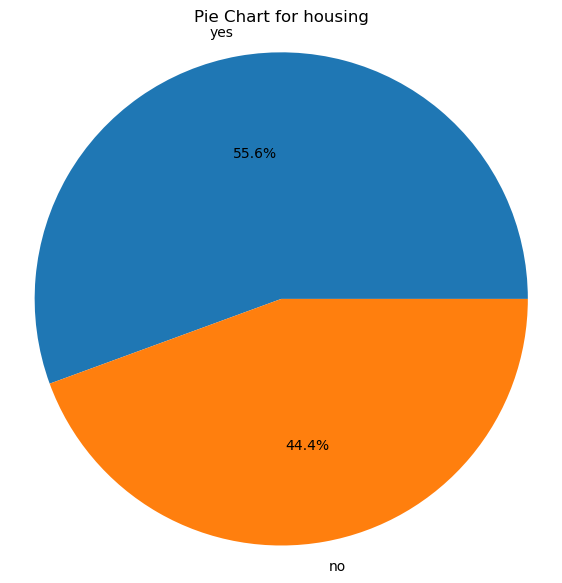

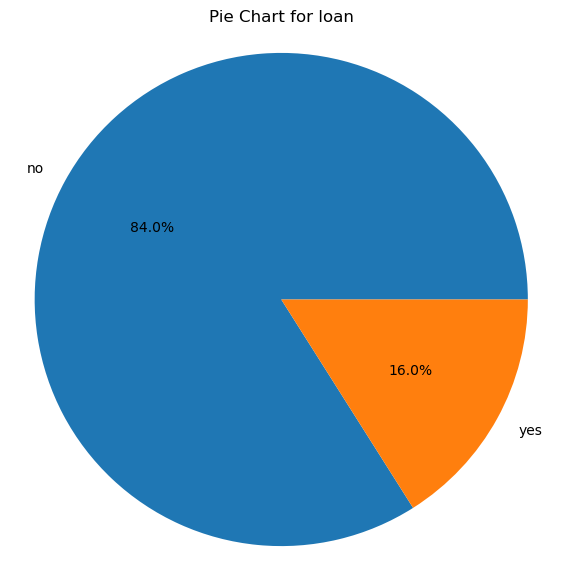

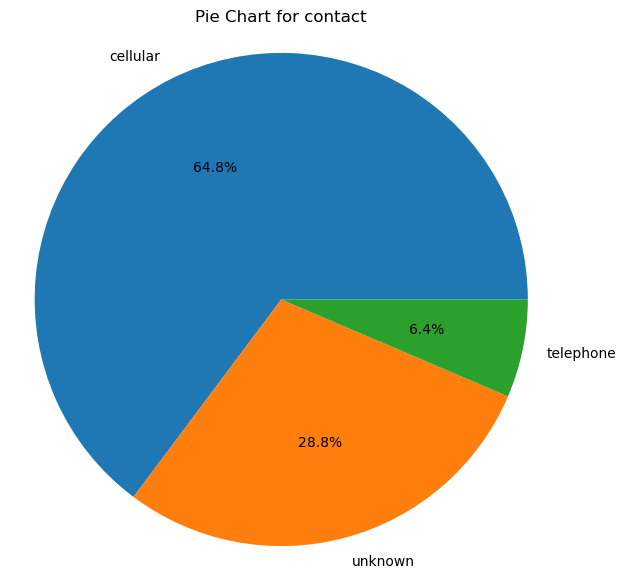

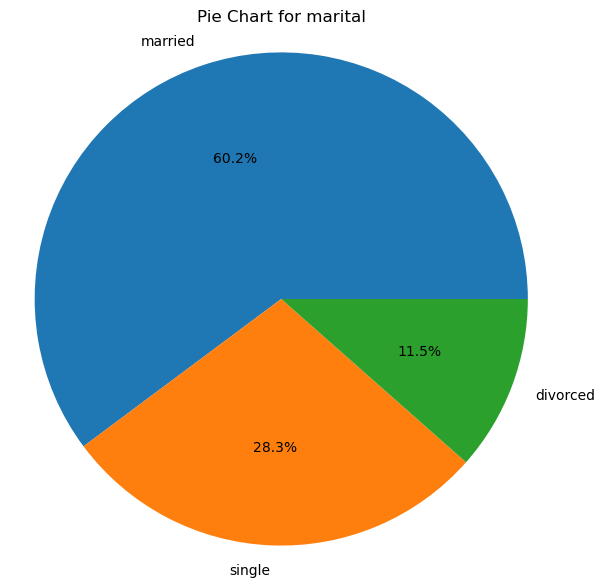

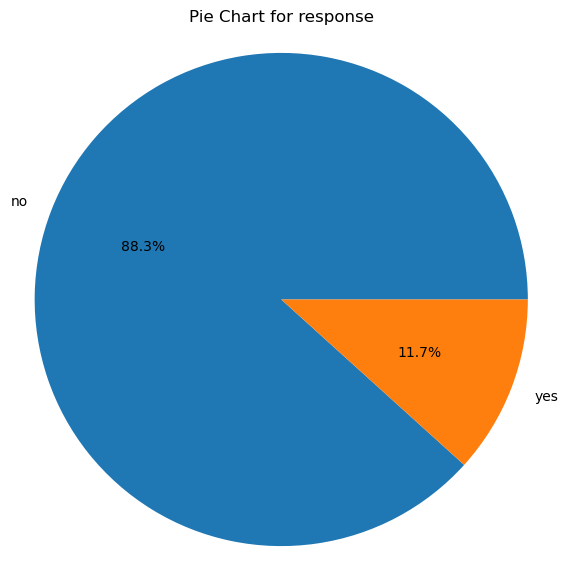

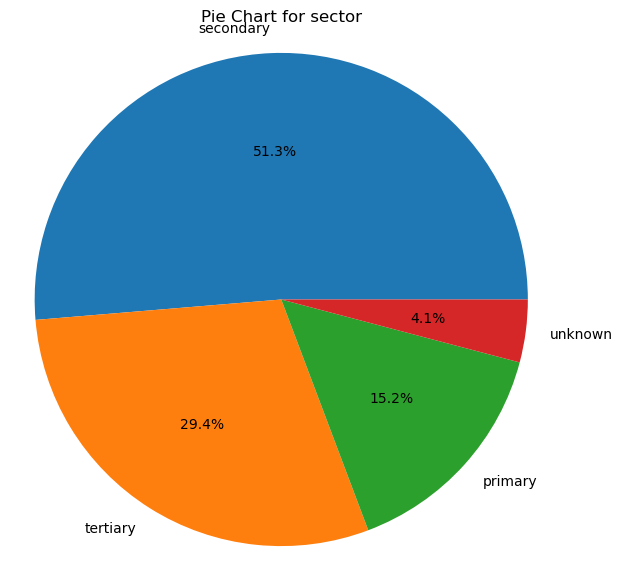

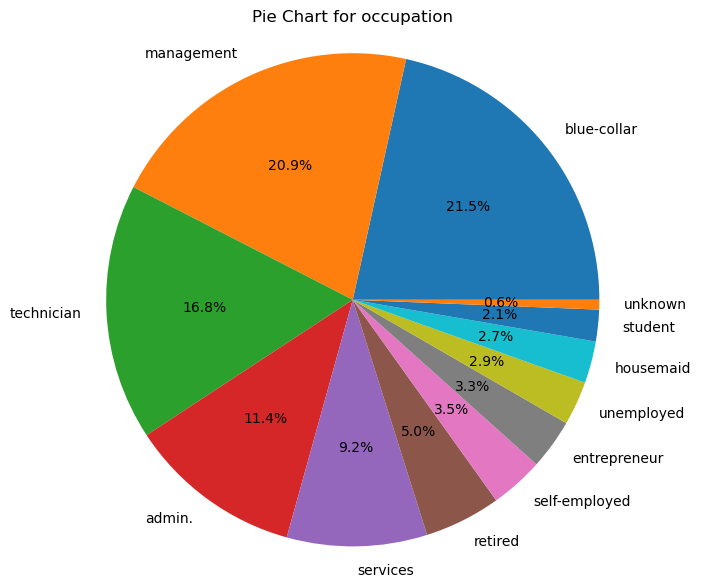

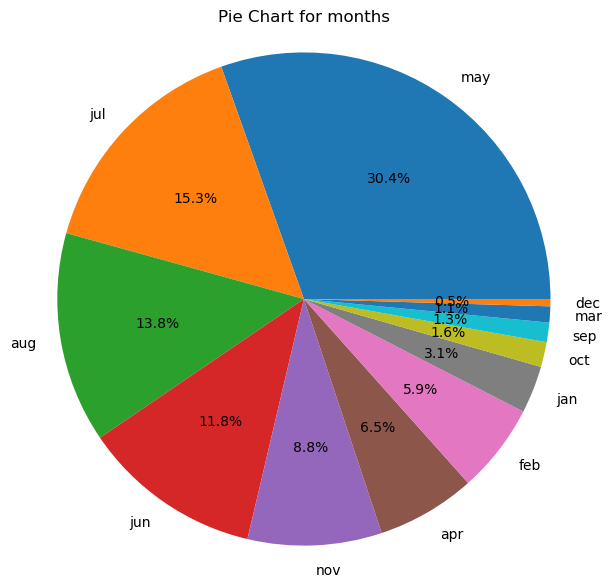

In [25]:
#pie charts are used to show uinvariant analysis of categorical columns
categorical_columns = ["targeted","default","housing","loan","contact","marital","response","sector","occupation","months"] 
for column in categorical_columns:
    category_counts = df[column].value_counts()
    plt.figure(figsize=(7, 7))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart for {column}')
    plt.axis('equal')
    plt.show()

In [26]:
#data imputation
#filling up missing and unknown values
df["response"].describe()

count     45181
unique        2
top          no
freq      39894
Name: response, dtype: object

In [27]:
df["response"].isna().sum()

30

In [28]:
#Filling up missing values in the resposne column with mode in resposne
df["response"]=df["response"].fillna(df["response"].mode()[0])
df["response"].isna().sum()

0

In [29]:
df["months"].describe()

count     45161
unique       12
top         may
freq      13747
Name: months, dtype: object

In [30]:
df["months"].isna().sum()

50

In [31]:
#Filling up missing values in month column with mode 
df["months"]=df["months"].fillna(df["months"].mode()[0])
df["months"].isna().sum()

0

In [32]:
df["year"].describe()

count    45161.0
mean      2017.0
std          0.0
min       2017.0
25%       2017.0
50%       2017.0
75%       2017.0
max       2017.0
Name: year, dtype: float64

In [33]:
df["year"].isna().sum()

50

In [34]:
df["year"]=df["year"].fillna(df["year"].mean())
df["year"].isna().sum()

0

In [35]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [36]:
df["contact"].describe()

count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object

In [37]:
#Filling up unknown in contact column with mode 
mode_contact=df["contact"].mode()[0]
replacement_value = mode_contact
df["contact"].replace('unknown', replacement_value, inplace=True)
df["contact"] = df["contact"].astype('category')
df["contact"].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

In [38]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [39]:
#Filling up unknown in poutcome column with NA
replacement_value = 'NA'
df["poutcome"].replace('unknown', replacement_value, inplace=True)
df["poutcome"] = df["poutcome"].astype('category')
df["poutcome"].value_counts()

NA         36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [40]:
df["sector"].describe()

count         45211
unique            4
top       secondary
freq          23202
Name: sector, dtype: object

In [41]:
df["sector"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: sector, dtype: int64

In [42]:
df["sector"]=df["sector"].fillna(df["sector"].mode()[0])
df["sector"].describe()

count         45211
unique            4
top       secondary
freq          23202
Name: sector, dtype: object

In [43]:
df["occupation"].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: occupation, dtype: object

In [44]:
df["occupation"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: occupation, dtype: int64

In [45]:
df["occupation"]=df["occupation"].fillna(df["occupation"].mode()[0])
df["occupation"].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: occupation, dtype: object

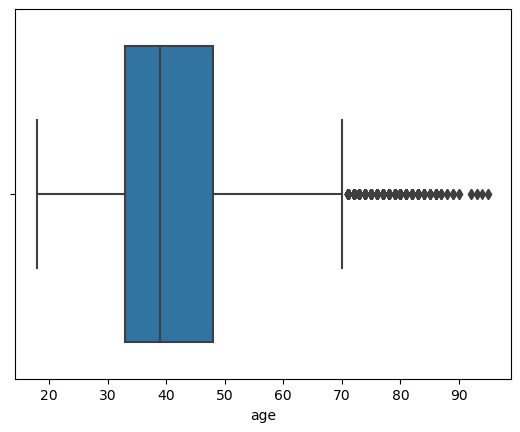

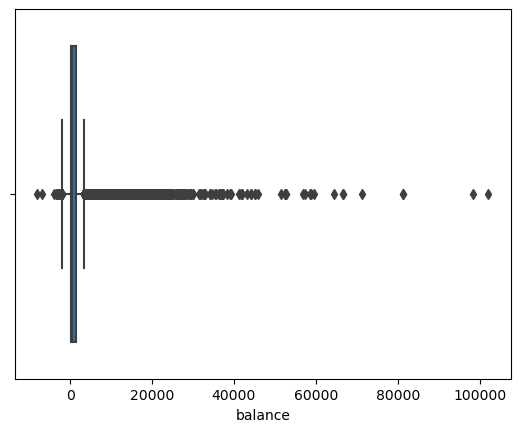

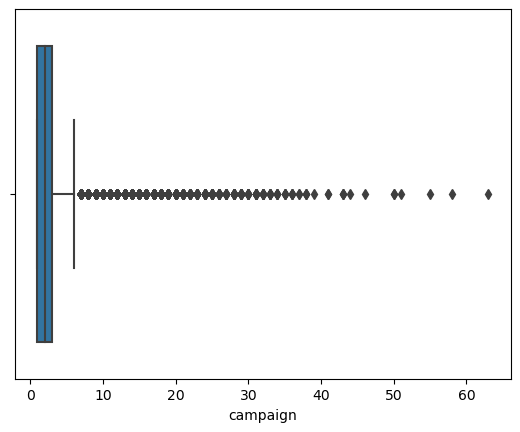

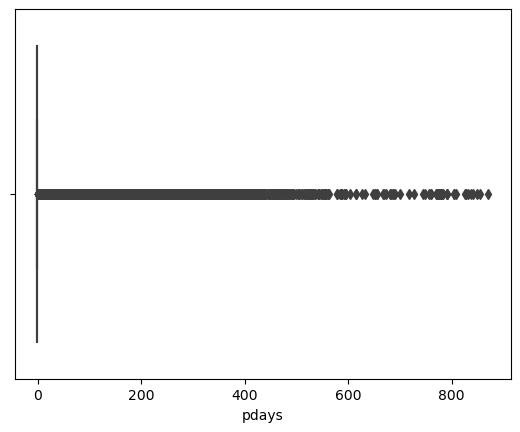

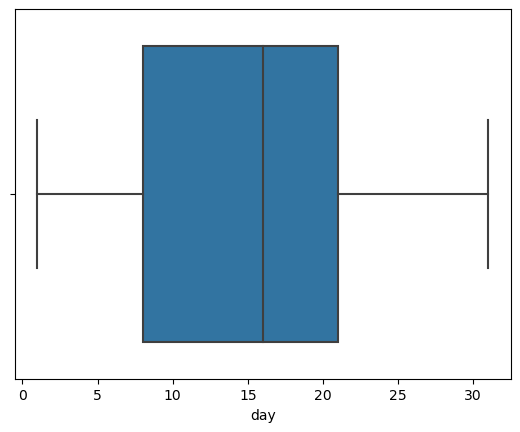

In [46]:
#numerical columns with outliers
list_num=["age","balance","campaign","pdays","day"]
for i in list_num:
    sns.boxplot(x=df[i])
    plt.show()

In [47]:
#data imputation
df["age"].describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [48]:
df["age"]=df["age"].fillna(df["age"].mean())
df["age"].isna().sum()

0

In [49]:
df["campaign"].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [50]:
df["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [51]:
#negative values was replaced with 0
nc = 'pdays'
df[nc] = df[nc].replace(-1, 0)
df["pdays"].describe()

count    45211.000000
mean        41.015195
std         99.792615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        871.000000
Name: pdays, dtype: float64

In [52]:
df["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [53]:
nc_new="balance"
df.loc[df[nc_new]<0,nc_new]=0
df["balance"].describe()

count     45211.000000
mean       1388.734069
std        3029.530442
min           0.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [54]:
#negative values were removed
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous,total_duration,year
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.0
mean,22606.000000,40.935651,57006.171065,1388.734069,15.806419,2.763841,41.015195,0.580323,258.163080,2017.0
std,13051.435847,10.616848,32085.718415,3029.530442,8.322476,3.098021,99.792615,2.303441,257.527812,0.0
min,1.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2017.0
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,0.000000,0.000000,103.000000,2017.0
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,0.000000,0.000000,180.000000,2017.0
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,0.000000,0.000000,319.000000,2017.0
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000,4918.000000,2017.0


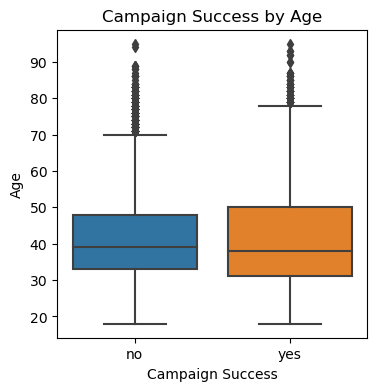

In [55]:
#Task4:-Bivariate Analysis
#independent variables:-sector,occupation,martial,
plt.figure(figsize=(4, 4))
sns.boxplot(x='response', y='age', data=df)
plt.title('Campaign Success by Age')
plt.xlabel('Campaign Success')
plt.ylabel('Age')
plt.show()

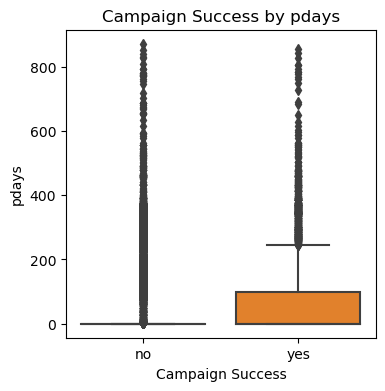

In [56]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='response', y='pdays', data=df)
plt.title('Campaign Success by pdays')
plt.xlabel('Campaign Success')
plt.ylabel('pdays')
plt.show()

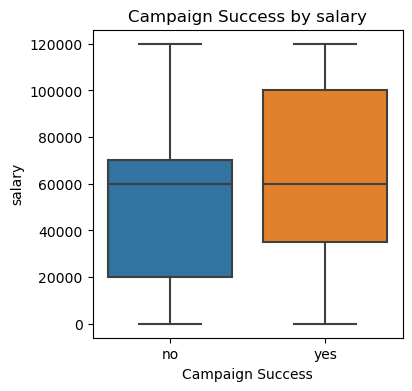

In [57]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='response', y='salary', data=df)
plt.title('Campaign Success by salary')
plt.xlabel('Campaign Success')
plt.ylabel('salary')
plt.show()

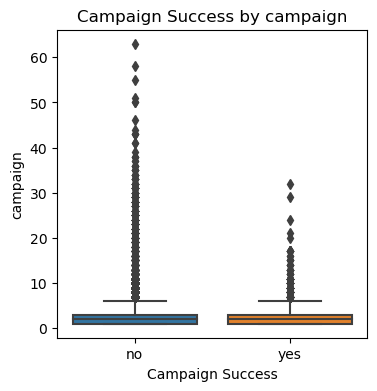

In [58]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='response', y='campaign', data=df)
plt.title('Campaign Success by campaign')
plt.xlabel('Campaign Success')
plt.ylabel('campaign')
plt.show()

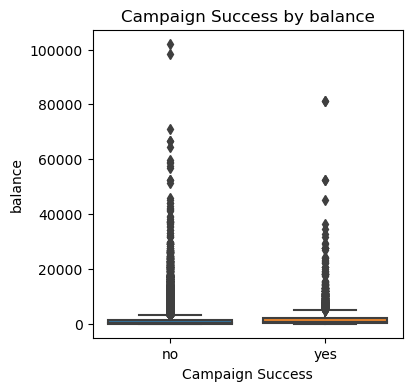

In [59]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='response', y='balance', data=df)
plt.title('Campaign Success by balance')
plt.xlabel('Campaign Success')
plt.ylabel('balance')
plt.show()

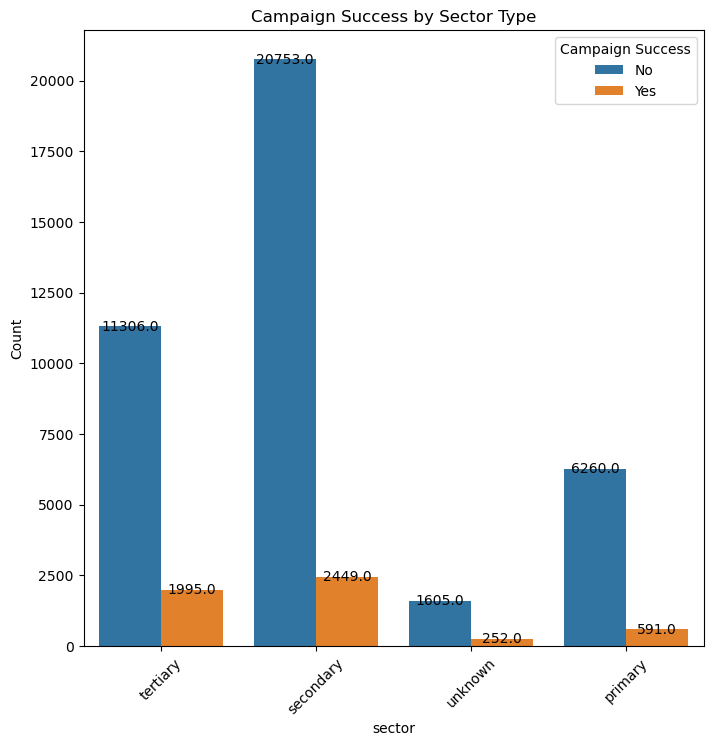

In [61]:
plt.figure(figsize=(8, 8))
sns.countplot(x='sector', hue='response', data=df)
plt.title('Campaign Success by Sector Type')
plt.xlabel('sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Campaign Success', labels=['No', 'Yes'])
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(bar.get_height()),
             ha='center',
             va='center')
plt.show()

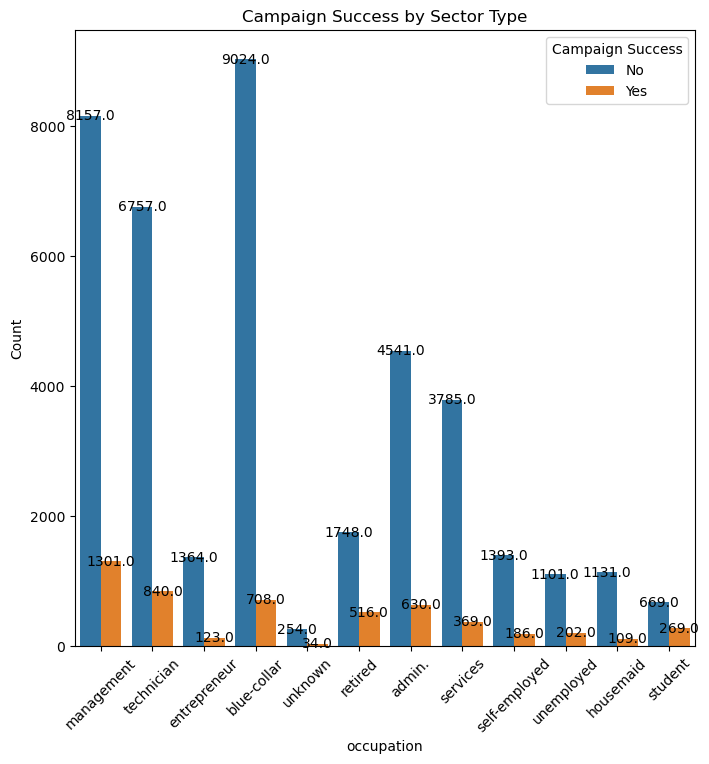

In [62]:
plt.figure(figsize=(8, 8))
sns.countplot(x='occupation', hue='response', data=df)
plt.title('Campaign Success by Sector Type')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Campaign Success', labels=['No', 'Yes'])
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(bar.get_height()),
             ha='center',
             va='center')
plt.show()

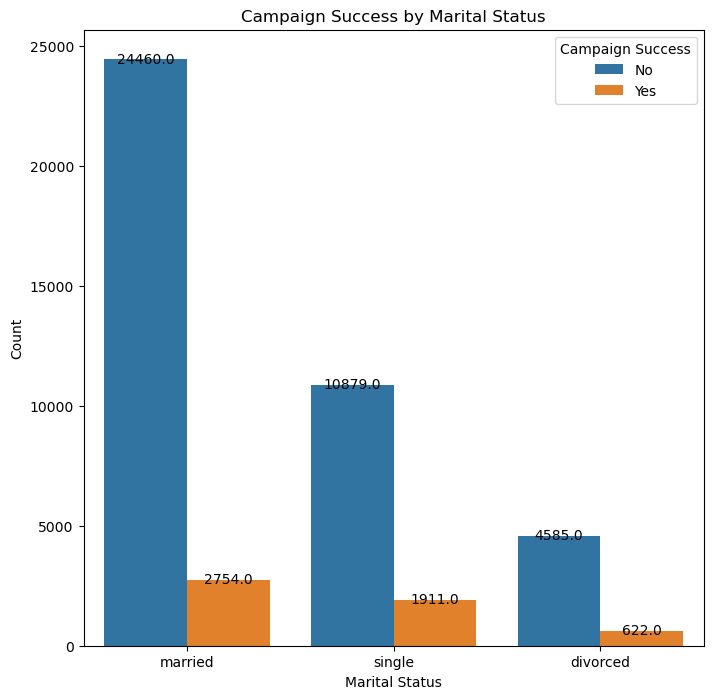

In [63]:
plt.figure(figsize=(8, 8))
sns.countplot(x='marital', hue='response', data=df)
plt.title('Campaign Success by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Campaign Success', labels=['No', 'Yes'])
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(bar.get_height()),
             ha='center',
             va='center')
plt.show()

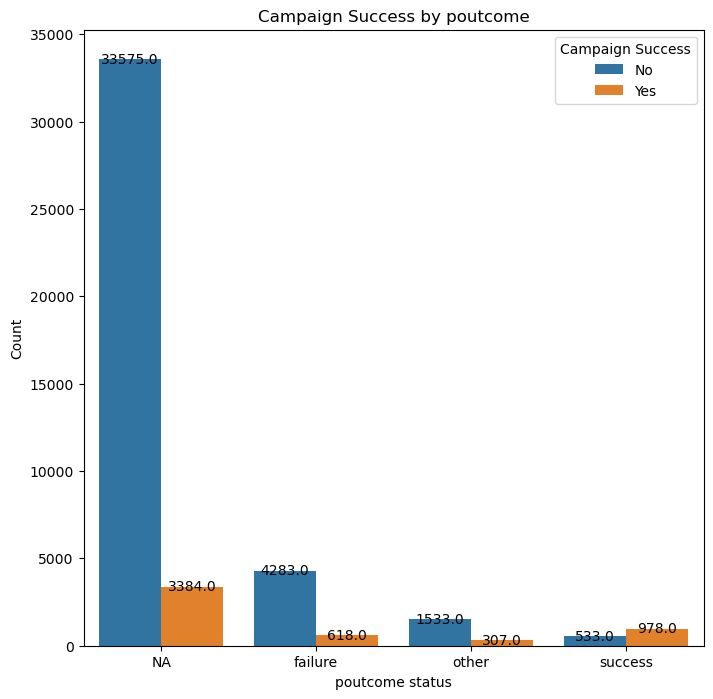

In [64]:
plt.figure(figsize=(8, 8))
sns.countplot(x='poutcome', hue='response', data=df)
plt.title('Campaign Success by poutcome')
plt.xlabel('poutcome status')
plt.ylabel('Count')
plt.legend(title='Campaign Success', labels=['No', 'Yes'])
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(bar.get_height()),
             ha='center',
             va='center')
plt.show()

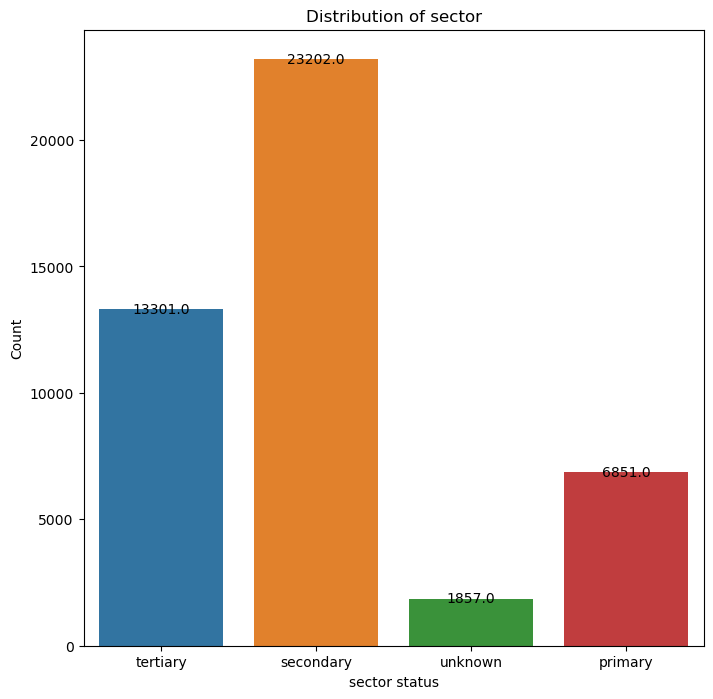

In [65]:
#Task5:-Categorical Variables Analysis
plt.figure(figsize=(8, 8))
sns.countplot(x='sector', data=df)
plt.title('Distribution of sector')
plt.xlabel('sector status')
plt.ylabel('Count')
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(bar.get_height()),
             ha='center',
             va='center')
plt.show()

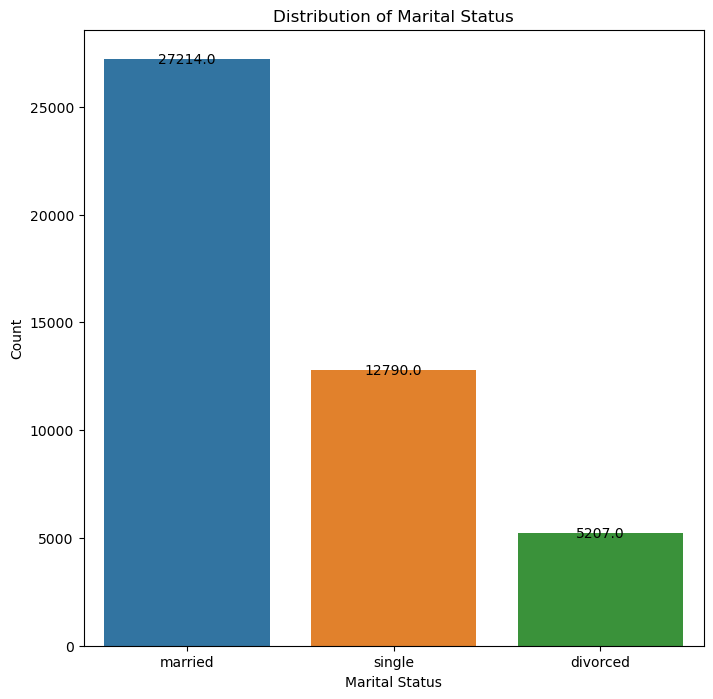

In [66]:
plt.figure(figsize=(8, 8))
sns.countplot(x='marital', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(bar.get_height()),
             ha='center',
             va='center')
plt.show()

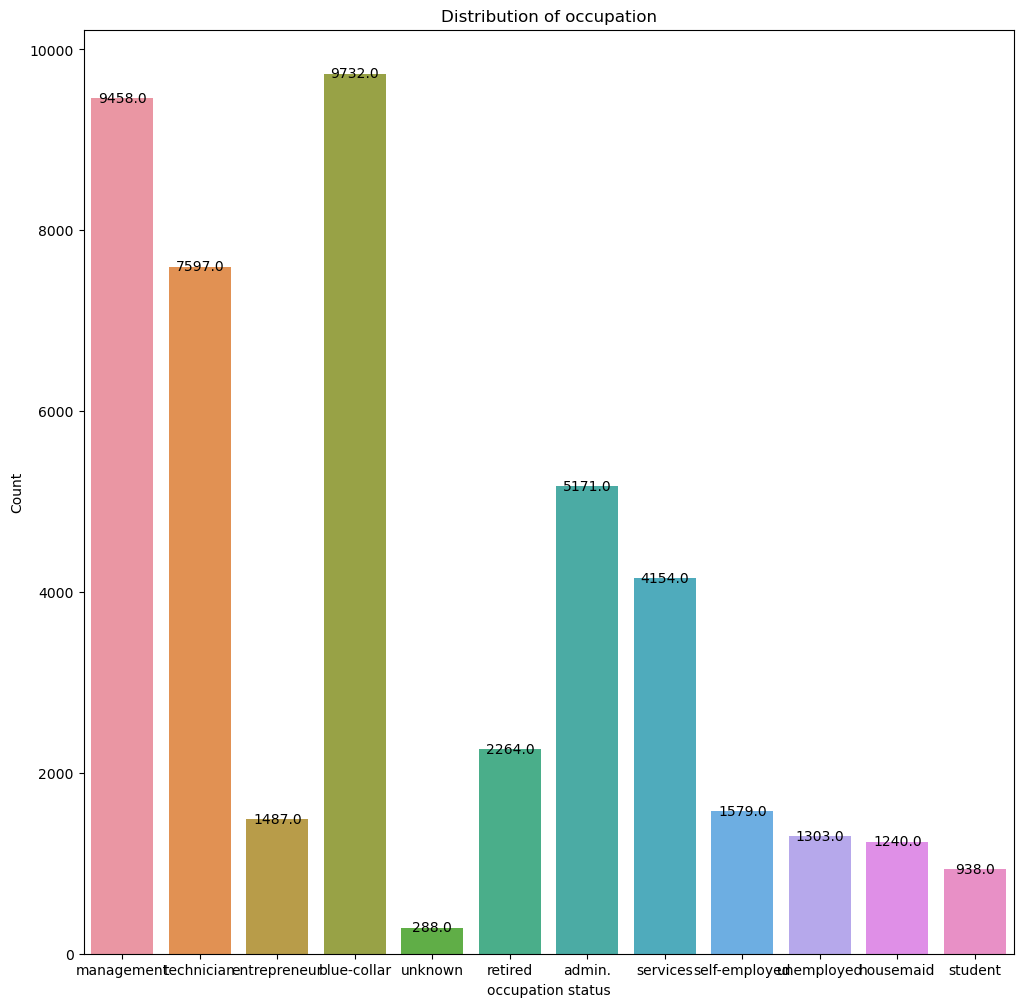

In [67]:
plt.figure(figsize=(12, 12))
sns.countplot(x='occupation', data=df)
plt.title('Distribution of occupation')
plt.xlabel('occupation status')
plt.ylabel('Count')
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(bar.get_height()),
             ha='center',
             va='center')
plt.show()

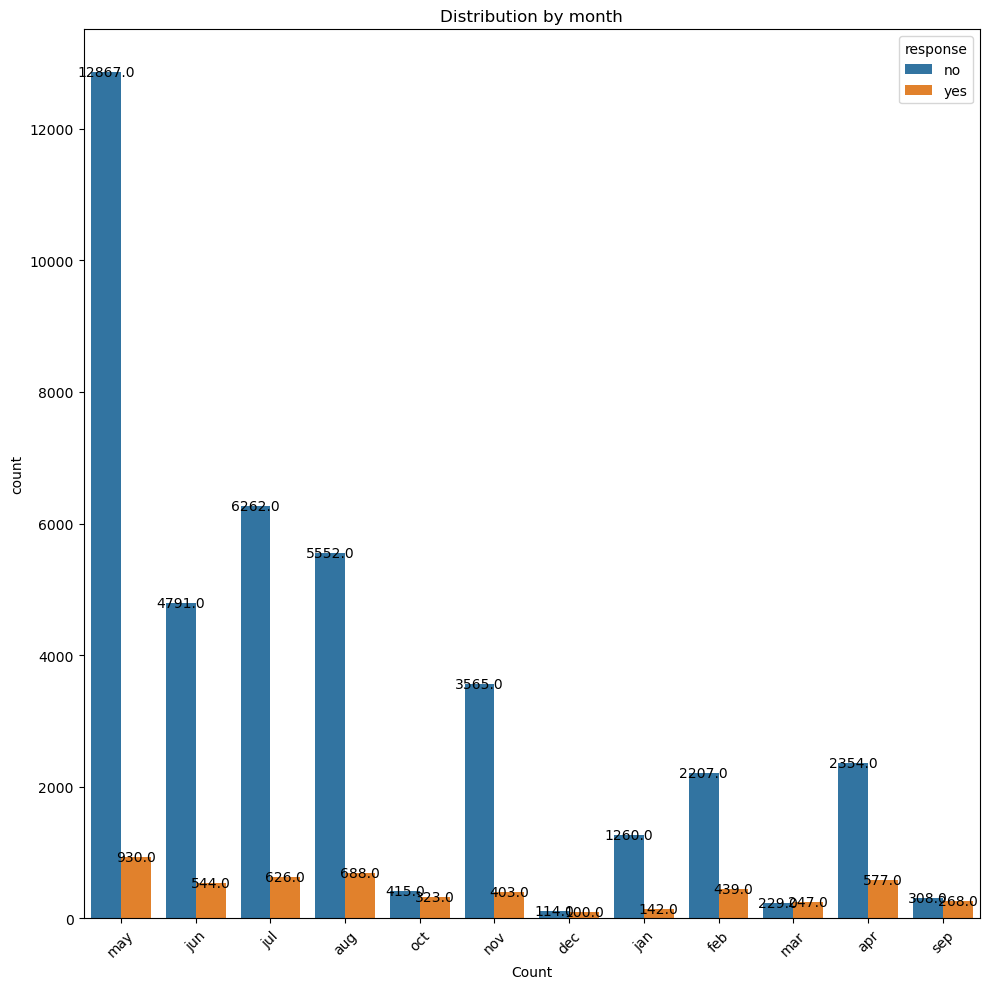

In [68]:
#Task6:-Temporal Analysis
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='months',hue='response')
plt.title("Distribution by month")
plt.xlabel('months')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.legend(title="response",loc='upper right')
plt.tight_layout()
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             str(bar.get_height()),
             ha='center',
             va='center')
plt.show()

In [69]:
# Feature Engineering
df['age_group'] = pd.cut(df['age'], bins=[0,25,35,45,55,65,75,85,np.inf],labels=['<25','25-35','36-45','46-55','56-65','65-75','76-85','86+'])
df['income_category'] = pd.cut(df['salary'], bins=[0, 20000, 40000, 60000, 80000,100000,np.inf], labels=['<20k', '21k-40k', '41k-60k', '61k-80k', '81k-100k','100k+'])
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,total_duration,occupation,sector,months,year,age_group,income_category
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,cellular,5,"may, 2017",261 sec,1,0,0,NA,no,261.0,management,tertiary,may,2017.0,56-65,81k-100k
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,cellular,5,"may, 2017",151 sec,1,0,0,NA,no,151.0,technician,secondary,may,2017.0,36-45,41k-60k
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,cellular,5,"may, 2017",76 sec,1,0,0,NA,no,76.0,entrepreneur,secondary,may,2017.0,25-35,100k+
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,cellular,5,"may, 2017",92 sec,1,0,0,NA,no,92.0,blue-collar,unknown,may,2017.0,46-55,<20k
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,cellular,5,"may, 2017",198 sec,1,0,0,NA,no,198.0,unknown,unknown,may,2017.0,25-35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,0,0,NA,yes,977.0,technician,tertiary,nov,2017.0,46-55,41k-60k
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,0,0,NA,yes,456.0,retired,primary,nov,2017.0,65-75,41k-60k
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,1127.0,retired,secondary,nov,2017.0,65-75,41k-60k
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,0,0,NA,no,508.0,blue-collar,secondary,nov,2017.0,56-65,<20k


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [70]:
month_mapping = {
    'jan': 1,'feb': 2,'mar': 3,'apr': 4,'may': 5,'jun': 6,'jul': 7,'aug': 8,'sep': 9,'oct': 10,'nov': 11, 'dec': 12}
df['months'] = df['months'].map(month_mapping)
df['combined_date'] = pd.to_datetime(df[['year','months','day']])
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,total_duration,occupation,sector,months,year,age_group,income_category,combined_date
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,cellular,5,"may, 2017",261 sec,1,0,0,NA,no,261.0,management,tertiary,5,2017.0,56-65,81k-100k,2017-05-05
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,cellular,5,"may, 2017",151 sec,1,0,0,NA,no,151.0,technician,secondary,5,2017.0,36-45,41k-60k,2017-05-05
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,cellular,5,"may, 2017",76 sec,1,0,0,NA,no,76.0,entrepreneur,secondary,5,2017.0,25-35,100k+,2017-05-05
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,cellular,5,"may, 2017",92 sec,1,0,0,NA,no,92.0,blue-collar,unknown,5,2017.0,46-55,<20k,2017-05-05
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,cellular,5,"may, 2017",198 sec,1,0,0,NA,no,198.0,unknown,unknown,5,2017.0,25-35,NaN,2017-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,0,0,NA,yes,977.0,technician,tertiary,11,2017.0,46-55,41k-60k,2017-11-17
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,0,0,NA,yes,456.0,retired,primary,11,2017.0,65-75,41k-60k,2017-11-17
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,1127.0,retired,secondary,11,2017.0,65-75,41k-60k,2017-11-17
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,0,0,NA,no,508.0,blue-collar,secondary,11,2017.0,56-65,<20k,2017-11-17


In [71]:
df_new=df
df_new

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,total_duration,occupation,sector,months,year,age_group,income_category,combined_date
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,cellular,5,"may, 2017",261 sec,1,0,0,NA,no,261.0,management,tertiary,5,2017.0,56-65,81k-100k,2017-05-05
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,cellular,5,"may, 2017",151 sec,1,0,0,NA,no,151.0,technician,secondary,5,2017.0,36-45,41k-60k,2017-05-05
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,cellular,5,"may, 2017",76 sec,1,0,0,NA,no,76.0,entrepreneur,secondary,5,2017.0,25-35,100k+,2017-05-05
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,cellular,5,"may, 2017",92 sec,1,0,0,NA,no,92.0,blue-collar,unknown,5,2017.0,46-55,<20k,2017-05-05
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,cellular,5,"may, 2017",198 sec,1,0,0,NA,no,198.0,unknown,unknown,5,2017.0,25-35,NaN,2017-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,0,0,NA,yes,977.0,technician,tertiary,11,2017.0,46-55,41k-60k,2017-11-17
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,0,0,NA,yes,456.0,retired,primary,11,2017.0,65-75,41k-60k,2017-11-17
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,1127.0,retired,secondary,11,2017.0,65-75,41k-60k,2017-11-17
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,0,0,NA,no,508.0,blue-collar,secondary,11,2017.0,56-65,<20k,2017-11-17


In [95]:
df_new['response_new'] = df_new['response'].map({'yes': 1, 'no': 0})
df.drop(columns=['year'], inplace=True)
df.drop(columns=['month'], inplace=True)
df.drop(columns=['customerid'], inplace=True)
df_new

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,response,total_duration,occupation,sector,months,age_group,income_category,combined_date,response_new
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,cellular,5,261 sec,1,0,0,NA,no,261.0,management,tertiary,5,56-65,81k-100k,2017-05-05,0
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,cellular,5,151 sec,1,0,0,NA,no,151.0,technician,secondary,5,36-45,41k-60k,2017-05-05,0
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,cellular,5,76 sec,1,0,0,NA,no,76.0,entrepreneur,secondary,5,25-35,100k+,2017-05-05,0
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,cellular,5,92 sec,1,0,0,NA,no,92.0,blue-collar,unknown,5,46-55,<20k,2017-05-05,0
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,cellular,5,198 sec,1,0,0,NA,no,198.0,unknown,unknown,5,25-35,NaN,2017-05-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,16.2833333333333 min,3,0,0,NA,yes,977.0,technician,tertiary,11,46-55,41k-60k,2017-11-17,1
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,7.6 min,2,0,0,NA,yes,456.0,retired,primary,11,65-75,41k-60k,2017-11-17,1
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,18.7833333333333 min,5,184,3,success,yes,1127.0,retired,secondary,11,65-75,41k-60k,2017-11-17,1
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,8.46666666666667 min,4,0,0,NA,no,508.0,blue-collar,secondary,11,56-65,<20k,2017-11-17,0


In [96]:
df_new1 = df_new.groupby('response_new').agg({  'pdays': 'mean',  'previous': 'mean','campaign': 'mean','total_duration': 'mean','salary': 'mean','balance': 'mean','age': 'mean'
                                             ,'months': 'mean','day': 'mean'}).reset_index()
df_new1

,response_new,pdays,previous,campaign,total_duration,salary,balance,age,months,day
0,0,37.260395,0.502129,2.846333,221.189836,56772.367498,1332.038498,40.838815,6.126966,15.892020
1,1,69.369018,1.170796,2.140912,537.361074,58771.704180,1816.862304,41.666895,6.268962,15.160015


In [97]:
#Task6:-corerlation and relationship in data
#+1 postive corelation
#-1 negataive corelation
#0 neutral
cor=df_new.corr()
cor

C:\Users\Aneesh sharma\AppData\Local\Temp\ipykernel_7560\2413760958.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df_new.corr()


,age,salary,balance,day,campaign,pdays,previous,total_duration,months,response_new
age,1.000000,0.024368,0.097675,-0.009182,0.004851,-0.023848,0.001329,-0.004658,0.093056,0.025064
salary,0.024368,1.000000,0.055884,0.027864,0.015005,-0.015051,0.014564,-0.009937,0.099566,0.020024
balance,0.097675,0.055884,1.000000,0.005788,-0.014164,0.002627,0.016018,0.021325,0.093973,0.051427
day,-0.009182,0.027864,0.005788,1.000000,0.162490,-0.093024,-0.051710,-0.030206,0.101995,-0.028265
campaign,0.004851,0.015005,-0.014164,0.162490,1.000000,-0.088508,-0.032855,-0.084570,0.054704,-0.073172
pdays,-0.023848,-0.015051,0.002627,-0.093024,-0.088508,1.000000,0.454288,-0.001584,-0.108892,0.103396
previous,0.001329,0.014564,0.016018,-0.051710,-0.032855,0.454288,1.000000,0.001203,-0.035509,0.093286
total_duration,-0.004658,-0.009937,0.021325,-0.030206,-0.084570,-0.001584,0.001203,1.000000,-0.011789,0.394531
months,0.093056,0.099566,0.093973,0.101995,0.054704,-0.108892,-0.035509,-0.011789,1.000000,0.018955
response_new,0.025064,0.020024,0.051427,-0.028265,-0.073172,0.103396,0.093286,0.394531,0.018955,1.000000


<Axes: >

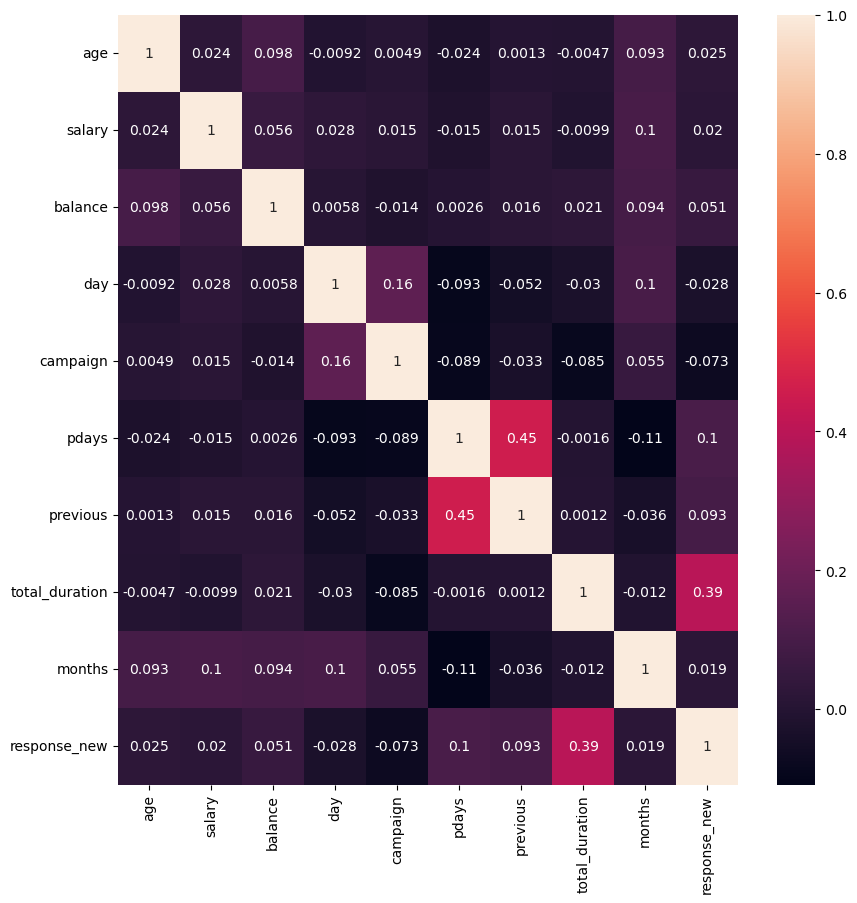

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

In [ ]:
##End##